In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pandas numpy nltk matplotlib wordcloud seaborn openpyxl
!pip install datasets
!pip install evaluate
!pip install transformers
!pip install --upgrade pip
!pip install datasets scikit-learn transformers evaluate huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from collections import Counter
import re
import nltk
nltk.download('all')  # Download all available resources (fixes any missing ones)
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

# **Task 01: Preparing Data**

In [4]:
# Defining the file paths and their corresponding categories
file_paths = {
    "/content/drive/MyDrive/Data/Data/Business.xlsx": "Business",
    "/content/drive/MyDrive/Data/Data/Opinion.xlsx": "Opinion",
    "/content/drive/MyDrive/Data/Data/Political_gossip.xlsx": "Political Gossip",
    "/content/drive/MyDrive/Data/Data/Sports.xlsx": "Sports",
    "/content/drive/MyDrive/Data/Data/World_news.xlsx": "World News"
}

# Initialize an empty list to store DataFrames
dfs = []

# Read each file, add the 'class' column, and drop 'title'
for file, category in file_paths.items():
    df = pd.read_excel(file)  # Read Excel file
    df["class"] = category  # Add class column
    df.drop(columns=["title"], inplace=True)  # Drop 'title' column
    dfs.append(df)  # Append to list

# Merge all DataFrames into a single DataFrame
final_df = pd.concat(dfs, ignore_index=True)

# Check for missing values
print("\nMissing values before treatment:")
print(final_df.isnull().sum())

# Handling missing values
final_df["class"].fillna("Unknown", inplace=True)  # Fill missing classes if any
final_df.dropna(subset=["content"], inplace=True)  # Remove rows with missing content

# Check again after treatment
print("\nMissing values after treatment:")
print(final_df.isnull().sum())

# Remove duplicates
final_df.drop_duplicates(inplace=True)

# Handle missing values (replace NaN with empty strings)
df["content"].fillna("", inplace=True)

# Save the final dataset as an Excel file
final_df.to_excel("Daily_Mirror_News.xlsx", index=False)
print("\nDataset saved as 'Daily_Mirror_News.xlsx'")



Missing values before treatment:
Unnamed: 0    0
content       4
class         0
dtype: int64

Missing values after treatment:
Unnamed: 0    0
content       0
class         0
dtype: int64


<ipython-input-4-c0c7c66b2c7a>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["class"].fillna("Unknown", inplace=True)  # Fill missing classes if any
<ipython-input-4-c0c7c66b2c7a>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method


Dataset saved as 'Daily_Mirror_News.xlsx'


# **Task** 2: EDA & Text Preprocessing

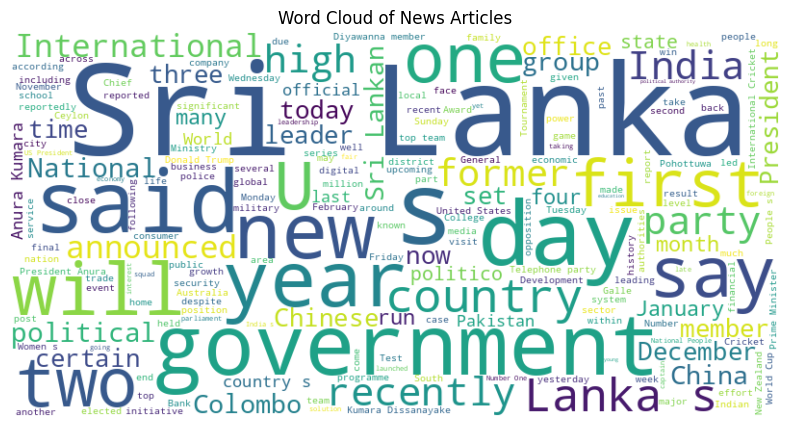

Most common bigrams: [('000 cash', 1), ('000 guests', 1), ('000 mark', 1), ('000 month', 1), ('000 new', 1), ('000 owed', 1), ('000 people', 1), ('000 purchased', 1), ('000 ramadan', 1), ('000 rs', 1)]
Most common trigrams: [('000 cash guilty', 1), ('000 mark days', 1), ('000 mark hitting', 1), ('000 month cost', 1), ('000 new entrepreneurs', 1), ('000 owed ific', 1), ('000 people evacuated', 1), ('000 people killed', 1), ('000 purchased pharmacy', 1), ('000 rs 60', 1)]


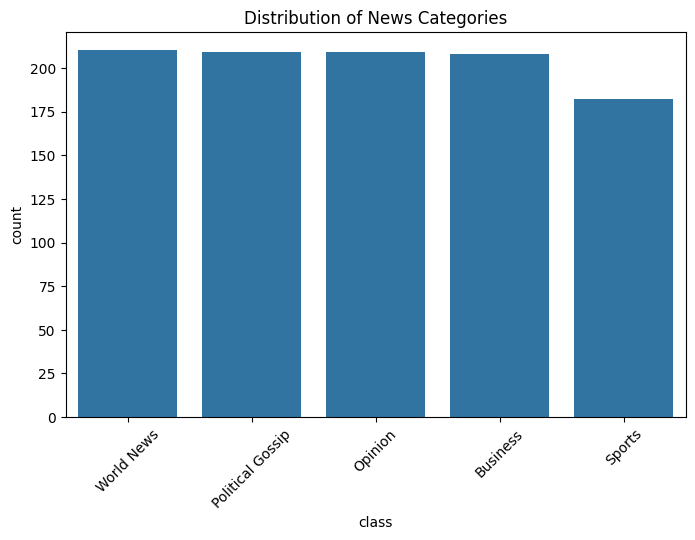

<ipython-input-9-90bae565303b>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=stopwords_df.head(20), x="Count", y="Word", palette="viridis")


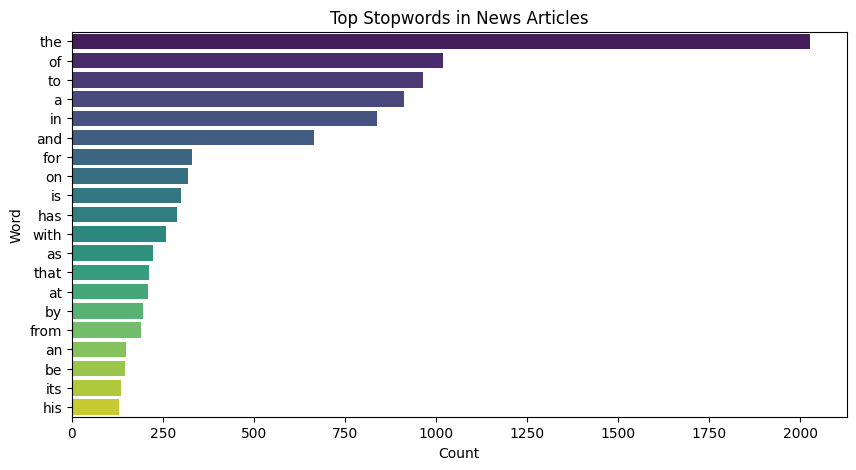

In [9]:
# ===== TASK 2: EDA =====

# Load cleaned dataset
df = pd.read_excel("Daily_Mirror_News.xlsx")

# Word Cloud
text_data = " ".join(df["content"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of News Articles")
plt.show()

# N-grams Analysis (Bigrams)
vectorizer_bigram = CountVectorizer(ngram_range=(2,2), stop_words='english')
bigrams = vectorizer_bigram.fit_transform(df["content"])
bigram_counts = Counter(vectorizer_bigram.get_feature_names_out())

print("Most common bigrams:", bigram_counts.most_common(10))

# N-grams Analysis (Trigrams)
vectorizer_trigram = CountVectorizer(ngram_range=(3,3), stop_words='english')
trigrams = vectorizer_trigram.fit_transform(df["content"])
trigram_counts = Counter(vectorizer_trigram.get_feature_names_out())

print("Most common trigrams:", trigram_counts.most_common(10))

# Plot Class Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of News Categories")
plt.show()

# Analyze Stopwords (Find Most Frequent Stopwords)
stopwords = set(STOPWORDS)
stopword_counts = Counter([word for word in text_data.split() if word in stopwords])

# Convert to DataFrame and plot
stopwords_df = pd.DataFrame(stopword_counts.items(), columns=["Word", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=stopwords_df.head(20), x="Count", y="Word", palette="viridis")
plt.title("Top Stopwords in News Articles")
plt.show()



In [26]:
# ===== TASK 2: Text Preprocessing Steps =====

# Load the dataset
df = pd.read_excel("Daily_Mirror_News.xlsx")

# Selecting a sample text
sample_text = df["content"].iloc[0]  # Choosing row 1

# Define preprocessing function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_step_by_step(text, is_sample=False):
    # Step 1: Convert to Lowercase - Ensures uniformity, avoids duplication of tokens, and simplifies further processing.
    text_step1 = text.lower()
    if is_sample:
        print("\n🔹 Step 1: Convert to Lowercase")
        print("Before:", text)
        print("After:", text_step1)

    # Step 2: Remove Special Characters & Numbers - Reduces noise and focuses the analysis on meaningful words.
    text_step2 = re.sub(r'[^a-z\s]', '', text_step1)
    if is_sample:
        print("\n🔹 Step 2: Remove Special Characters & Numbers")
        print("Before:", text_step1)
        print("After:", text_step2)

    # Step 3: Tokenization - Breaks down the text into manageable units (tokens) for further analysis.
    tokens = word_tokenize(text_step2)
    if is_sample:
        print("\n🔹 Step 3: Tokenization")
        print("Before:", text_step2)
        print("After:", tokens)

    # Step 4: Remove Stopwords - Eliminates frequent, meaningless words that do not contribute to the overall meaning of the text.
    tokens_step4 = [word for word in tokens if word not in stop_words]
    if is_sample:
        print("\n🔹 Step 4: Remove Stopwords")
        print("Before:", tokens)
        print("After:", tokens_step4)

    # Step 5: Lemmatization - Normalizes words to their base form, reducing variations and improving consistency in analysis.
    tokens_step5 = [lemmatizer.lemmatize(word) for word in tokens_step4]
    if is_sample:
        print("\n🔹 Step 5: Lemmatization")
        print("Before:", tokens_step4)
        print("After:", tokens_step5)

    return " ".join(tokens_step5)

# Apply preprocessing for the entire dataset
df["processed_content"] = df["content"].apply(lambda x: preprocess_text_step_by_step(x, is_sample=False))

# Print the detailed steps for the first article
print("\n🔹 Detailed Steps for the First Article:")
preprocess_text_step_by_step(sample_text, is_sample=True)

# Save preprocessed dataset as 'Preprocessed_Daily_Mirror_News.xlsx'
df[["processed_content", "class"]].to_excel("Preprocessed_Daily_Mirror_News.xlsx", index=False)

print("\n✅ Preprocessing completed and saved as 'Preprocessed_Daily_Mirror_News.xlsx'")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



🔹 Detailed Steps for the First Article:

🔹 Step 1: Convert to Lowercase
Before: Sri Lanka’s inflation is expected to increase “sizeably” in the third quarter this year (3Q25), with the possibility of it hovering around 2 percentage points above the inflation target in mid-2026, the Central Bank of Sri Lanka (CBSL) said in its monetary policy report that was released yesterday.
After: sri lanka’s inflation is expected to increase “sizeably” in the third quarter this year (3q25), with the possibility of it hovering around 2 percentage points above the inflation target in mid-2026, the central bank of sri lanka (cbsl) said in its monetary policy report that was released yesterday.

🔹 Step 2: Remove Special Characters & Numbers
Before: sri lanka’s inflation is expected to increase “sizeably” in the third quarter this year (3q25), with the possibility of it hovering around 2 percentage points above the inflation target in mid-2026, the central bank of sri lanka (cbsl) said in its monetary 

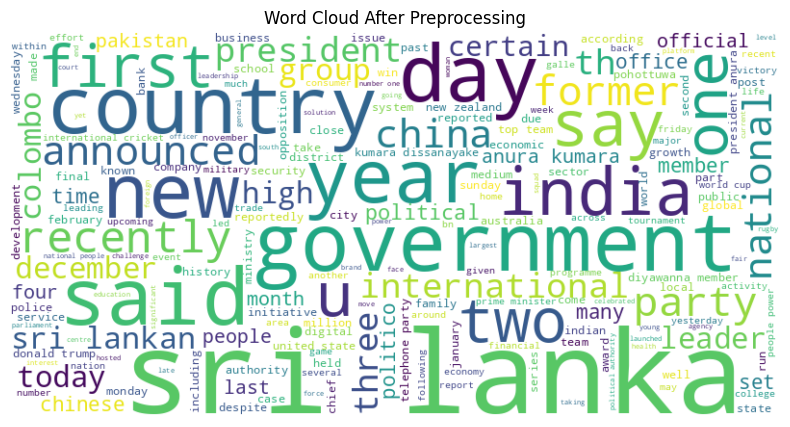

Most common bigrams after preprocessing: [('aac introduce', 1), ('aalka aalka', 1), ('aalka stable', 1), ('ab mauri', 1), ('abans plc', 1), ('abc news', 1), ('abducting driver', 1), ('abeywardana said', 1), ('ability recover', 1), ('able muster', 1)]


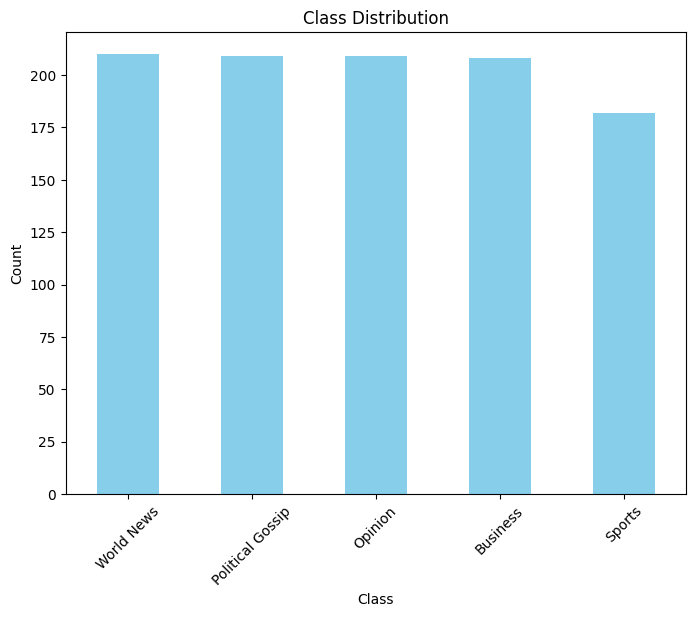


Most Common Stopwords in the Dataset:
there: 1
haven: 1
m: 1


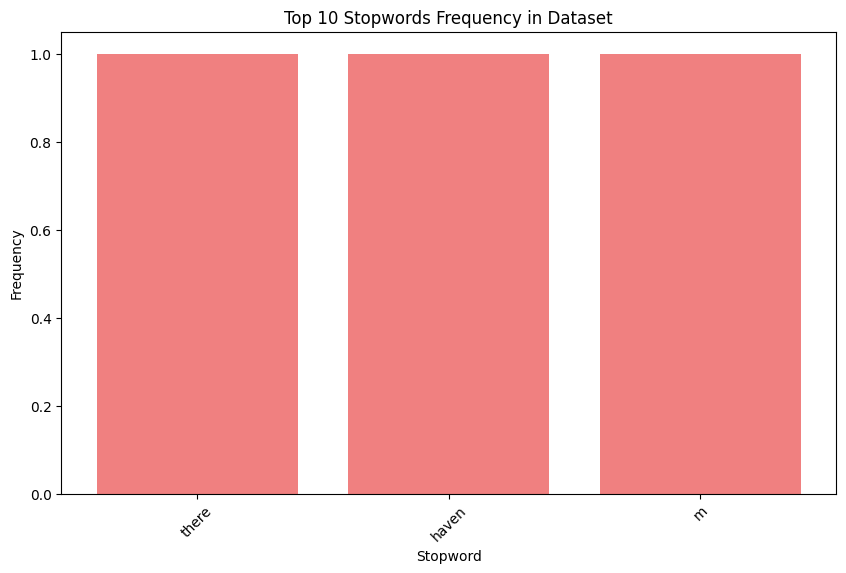

In [27]:
# EDA after preprocessing

# 1. Word Cloud After Preprocessing
text_data_cleaned = " ".join(df["processed_content"])

wordcloud_cleaned = WordCloud(width=800, height=400, background_color='white').generate(text_data_cleaned)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud After Preprocessing")
plt.show()

# 2. N-Grams After Preprocessing (Bigram Example)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams_cleaned = vectorizer.fit_transform(df["processed_content"])
bigram_counts_cleaned = Counter(vectorizer.get_feature_names_out())

print("Most common bigrams after preprocessing:", bigram_counts_cleaned.most_common(10))

# 3. Plot Class Distribution
class_counts = df["class"].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Stopwords EDA
# Load the stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Calculate stopwords frequency in the entire dataset
stopwords_in_data = [word for content in df["processed_content"] for word in content.split() if word in stop_words]

# Count stopwords frequency
stopword_counts = Counter(stopwords_in_data)

# Display the most common stopwords
print("\nMost Common Stopwords in the Dataset:")
for word, count in stopword_counts.most_common(10):
    print(f"{word}: {count}")

# Plot the distribution of stopwords in the dataset
plt.figure(figsize=(10, 6))
plt.bar([word for word, _ in stopword_counts.most_common(10)], [count for _, count in stopword_counts.most_common(10)], color='lightcoral')
plt.title('Top 10 Stopwords Frequency in Dataset')
plt.xlabel('Stopword')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# **Task 3: Select a Hugging Face Model**

For this text classification task involving news articles categorized into multiple classes such as Business, Opinion, Political Gossip, World News, and Evaluation, the model selected from Hugging Face is distilbert-base-uncased. This model is a distilled, lightweight version of the original BERT (bert-base-uncased) and retains over 95% of BERT’s performance while being significantly faster and more efficient in terms of computation and memory usage. Since the objective is to build a classifier that assigns one of several labels to each news article, distilbert-base-uncased is an appropriate choice as it is pretrained on large English corpora and effectively captures contextual representations of words. It can be fine-tuned using the DistilBertForSequenceClassification architecture by specifying the number of output labels (in this case, five). This model offers an optimal balance between accuracy and resource efficiency, making it well-suited for fine-tuning on the current dataset within environments that may have limited computational capacity.

# **Task 4: Finetune a Hugging Face Model**

In [ ]:
# Step 1:Importing libraries
import evaluate
import numpy as np
import pandas as pd

from IPython.display import clear_output
from huggingface_hub import notebook_login
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import DistilBertForSequenceClassification
from transformers import TrainingArguments
from transformers import Trainer
from transformers import AutoTokenizer
from datasets import Dataset, DatasetDict
from transformers import EarlyStoppingCallback
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# Step 2:Load Preprocessed Dataset
data = pd.read_excel("Preprocessed_Daily_Mirror_News.xlsx")

In [ ]:
# Step 3:Conversion of categorical 'class' values to numerical labels

# Import LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'class' column with numerical labels (0, 1, 2,...)
data['label'] = label_encoder.fit_transform(data['class'])

# Print the unique values of the encoded 'label' column
print(data['label'].unique())

# Display the fitted classes (i.e., the original labels that correspond to each numerical value)
print(label_encoder.classes_)


[0 1 2 3 4]
['Business' 'Opinion' 'Political Gossip' 'Sports' 'World News']


In [ ]:
# Step 4:Loading the tokenizer and model

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Selected Model: DistilBERT
model_checkpoint = "distilbert-base-uncased"

# Justification:
"""
We chose 'distilbert-base-uncased' as the base model due to the following reasons:
1. It is a lightweight version of BERT and is significantly faster while maintaining performance.
2. Ideal for fine-tuning on relatively small datasets like ours.
3. It is widely used and well-supported by Hugging Face for text classification tasks.
4. Lower computational cost makes it suitable for hosting in WebApps (especially Hugging Face Spaces).
"""

# Load tokenizer and base model for inspection
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=5)

print(f"Model '{model_checkpoint}' loaded with {model.num_labels} labels for fine-tuning.")


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model 'distilbert-base-uncased' loaded with 5 labels for fine-tuning.


In [ ]:
# Step 5: Split into Train & Validation (80%-20%)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data["processed_content"], data["label"], test_size=0.2, random_state=42
)

# Step 6: Load Tokenizer & Model
model_checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
model = DistilBertForSequenceClassification.from_pretrained(model_checkpoint, num_labels=5)

# Step 7: Tokenize the Text
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=512)

tokenized_train_dataset = train_dataset.map(tokenize_function, batched=True)
tokenized_val_dataset = val_dataset.map(tokenize_function, batched=True)

# Remove original text column (only keep tokenized features)
tokenized_train_dataset = tokenized_train_dataset.remove_columns(["text"])
tokenized_val_dataset = tokenized_val_dataset.remove_columns(["text"])

# Convert into a DatasetDict
hf_dataset = DatasetDict({"train": tokenized_train_dataset, "validation": tokenized_val_dataset})

# Step 8: Check the tokenized datasets
print(tokenized_train_dataset[5]['input_ids'], '\n')
print(tokenized_train_dataset[5]['attention_mask'], '\n')



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/814 [00:00<?, ? examples/s]

Map:   0%|          | 0/204 [00:00<?, ? examples/s]

[101, 2533, 6870, 5680, 2405, 3343, 4861, 3780, 6224, 2270, 5448, 2144, 2146, 3334, 2213, 6378, 3213, 7864, 2533, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from evaluate import load

# Step 9: Define Training Arguments
args = TrainingArguments(
    output_dir="HuggingFaceAttempt1",
    run_name="version1",
    evaluation_strategy="steps",  # Evaluate after every few steps
    eval_steps=100,  # Evaluate after every 100 steps
    per_device_train_batch_size=4,  # Training batch size
    per_device_eval_batch_size=4,  # Evaluation batch size
    num_train_epochs=3,  # Number of epochs
    seed=0,  # Set the random seed
    load_best_model_at_end=True,  # Pick the best model based on validation
    report_to=None,  # Avoid using W&B by not reporting to it
    save_steps=500,  # Save model every 10 steps

)

# Step 10: Define Metrics
metric = load("accuracy")

def compute_metrics(p):
    '''
    This function calculates accuracy, precision, recall, and f1 scores by comparing
    predicted values with true (reference) values.
    '''
    predictions, references = p
    preds = np.argmax(predictions, axis=1)  # Convert logits to class labels
    # Compute all relevant metrics (accuracy, precision, recall, and f1)
    return {
        "accuracy": metric.compute(predictions=preds, references=references),
        "precision": precision_recall_fscore_support(references, preds, average="macro")[0],
        "recall": precision_recall_fscore_support(references, preds, average="macro")[1],
        "f1": precision_recall_fscore_support(references, preds, average="macro")[2],
    }

# Step 11: Setup Trainer
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=hf_dataset["train"],
    eval_dataset=hf_dataset["validation"],
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],
)

# Set the model's label to class mapping
model.config.id2label = {
    0: "Business",
    1: "Opinion",
    2: "Political_gossip",
    3: "Sports",
    4: "World_news"
}

# Create the reverse mapping from label to id
model.config.label2id = {v: k for k, v in model.config.id2label.items()}


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
# Disable W&B login by setting the environment variable early
import os
os.environ["WANDB_DISABLED"] = "true"  # Disable W&B
import wandb

Fine-tuning the Model:

In [ ]:
# Step 12: Start Fine-Tuning
train_output = trainer.train()

# Save trained model
trainer.save_model("content/")

# Print the train output
print(train_output)

print("🚀 Fine-tuning complete!")


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
100,No log,0.458705,{'accuracy': 0.8676470588235294},0.877555,0.873311,0.873264
200,No log,0.401272,{'accuracy': 0.8823529411764706},0.888846,0.888635,0.887394
300,No log,0.422106,{'accuracy': 0.8872549019607843},0.896560,0.892446,0.893810
400,No log,0.490873,{'accuracy': 0.8872549019607843},0.893354,0.895087,0.890706
500,0.363300,0.472210,{'accuracy': 0.9019607843137255},0.907446,0.907941,0.906046


Trainer is attempting to log a value of "{'accuracy': 0.8676470588235294}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8823529411764706}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8872549019607843}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.8872549019607843}" of type <class 'dict'> for key "eval/accuracy" as a scalar. This invocation of Tensorboard's writer.add_scalar() is incorrect so we dropped this attribute.
Trainer is attempting to log a value of "{'accuracy': 0.9019607843137255}" o

TrainOutput(global_step=500, training_loss=0.3633096008300781, metrics={'train_runtime': 8260.8225, 'train_samples_per_second': 0.296, 'train_steps_per_second': 0.074, 'total_flos': 264419073576960.0, 'train_loss': 0.3633096008300781, 'epoch': 2.450980392156863})
🚀 Fine-tuning complete!


Saving the Model:

In [ ]:
# Log into Hugging Face (fixes 401 Unauthorized issue)
from huggingface_hub import notebook_login
notebook_login()

# Save model and tokenizer locally
model.save_pretrained("News_Classification_Model")
tokenizer.save_pretrained("News_Classification_Model")  # Save tokenizer locally


('News_Classification_Model/tokenizer_config.json',
 'News_Classification_Model/special_tokens_map.json',
 'News_Classification_Model/vocab.txt',
 'News_Classification_Model/added_tokens.json',
 'News_Classification_Model/tokenizer.json')

In [ ]:
# Pushes the Model and Tokenizer to Hugging Face Hub
model.push_to_hub("TAgroup5/news-classification-model")
tokenizer.push_to_hub("TAgroup5/news-classification-model")


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/TAgroup5/news-classification-model/commit/2cb540dc84e4c1e32677882b59b4114dbfb44b11', commit_message='Upload tokenizer', commit_description='', oid='2cb540dc84e4c1e32677882b59b4114dbfb44b11', pr_url=None, repo_url=RepoUrl('https://huggingface.co/TAgroup5/news-classification-model', endpoint='https://huggingface.co', repo_type='model', repo_id='TAgroup5/news-classification-model'), pr_revision=None, pr_num=None)

In [ ]:
# Loads the model
new_model = "TAgroup5/news-classification-model"

Calling the Pre-trained Model:

In [ ]:
# Load model and tokenizer from Hugging Face Hub
from transformers import pipeline

# Use Hugging Face pipeline to classify the text
pipe = pipeline("text-classification", model="TAgroup5/news-classification-model")

text = '''
Emerging threats in maritime waters have posed significant challenges to the land-locked as well as littoral states such as Sri Lanka.'''
# Get prediction
predictions = pipe(text)
print(predictions)


Device set to use cpu


[{'label': 'Opinion', 'score': 0.9944149255752563}]


In [28]:
# Include the link to your fine-tuned model pushed to Hugging Face
model_link = "https://huggingface.co/spaces/TAgroup5/demo-News_classifier"
print("Fine-tuned model is available at:", model_link)


Fine-tuned model is available at: https://huggingface.co/spaces/TAgroup5/demo-News_classifier
